In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from ast import literal_eval

In [67]:
exp_1_d = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder_exp_1_d.csv')

In [68]:
exp_1_d.shape

(9680000, 8)

In [71]:
exp_1_d.head(1)

,experiment,split,epoch,accuracy,tloss,lloss,true,pred
0,exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5...,training,1,0.841,500.0,0.452,[3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 4 4 4...,[1 1 4 4 4 4 4 4 1 4 4 4 4 4 4 1 4 4 3 1 4 4 4...


In [70]:
exp_1_d.experiment.unique()

array(['exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.0',
       'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.5',
       'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_3_conv_filters_100_conv_kernels_[2]_lambda_0.0',
       'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_1_conv_filters_100_conv_kernels_[2]_lambda_0.0'],
      dtype=object)

### Experimento 1 d - conv layers = 5 

In [73]:
conv_layers_5_lamb_0 = exp_1_d[exp_1_d.experiment == 'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.0']
conv_layers_5_lamb_0_5 = exp_1_d[exp_1_d.experiment == 'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.5']

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

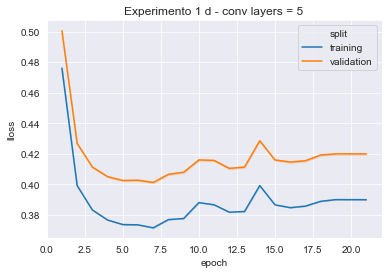

In [74]:
sns.set_style('darkgrid')
train_val_df = conv_layers_5_lamb_0[conv_layers_5_lamb_0.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='lloss', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 1 d - conv layers = 5')
ax_acc.plot()

In [83]:
val_epoch = conv_layers_5_lamb_0[(conv_layers_5_lamb_0.epoch == 6) &
                                 (conv_layers_5_lamb_0.split == 'validation')]
y_true = val_epoch.true.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
y_pred = val_epoch.pred.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
target_names = ['PER', 'LOC', 'ORG', 'MISC', 'O']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        PER       0.05      0.00      0.00     16331
        LOC       0.18      0.02      0.04     17874
        ORG       0.00      0.00      0.00     11697
       MISC       0.18      0.07      0.10     23557
          O       0.90      0.99      0.94    530541

avg / total       0.81      0.88      0.84    600000



/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

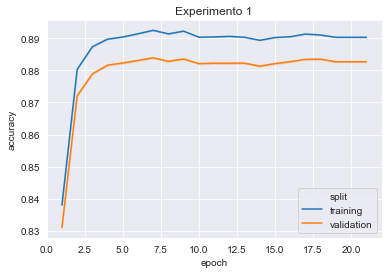

In [76]:
sns.set_style('darkgrid')
train_val_df = conv_layers_5_lamb_0[conv_layers_5_lamb_0.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 1')
ax_acc.plot()

### Experimento 1 c - conv layers = 5 

In [92]:
exp_1_c = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder_exp_1_c.csv')
conv_layers_5 = exp_1_c[exp_1_c.experiment == 'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.0']

In [94]:
print(conv_layers_5.shape)
exp_1_c.experiment.unique() # aparece el exp name con 'd' porque no se modifico en el json de configuracion

(1920000, 8)


array(['exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_1_conv_filters_100_conv_kernels_[2]_lambda_0.0',
       'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_3_conv_filters_100_conv_kernels_[2]_lambda_0.0',
       'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.0'],
      dtype=object)

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

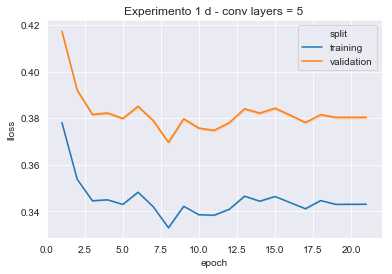

In [95]:
sns.set_style('darkgrid')
train_val_df = conv_layers_5[conv_layers_5.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='lloss', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 1 d - conv layers = 5')
ax_acc.plot()

In [103]:
val_epoch = conv_layers_5[(conv_layers_5.epoch == 8) &
                                 (conv_layers_5.split == 'validation')]
y_true = val_epoch.true.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
y_pred = val_epoch.pred.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
target_names = ['PER', 'LOC', 'ORG', 'MISC', 'O']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        PER       0.06      0.00      0.00     16331
        LOC       0.82      0.00      0.00     17874
        ORG       0.00      0.00      0.00     11697
       MISC       0.15      0.11      0.13     23557
          O       0.91      1.00      0.95    530541

avg / total       0.83      0.89      0.85    600000



/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

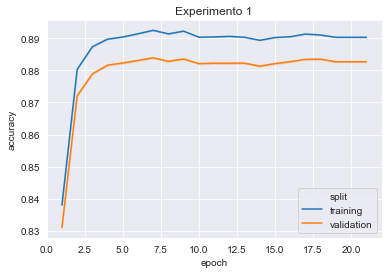

In [76]:
sns.set_style('darkgrid')
train_val_df = conv_layers_5[conv_layers_5.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 1')
ax_acc.plot()

### Experimento 1 a - conv layers = 5 

In [104]:
exp_1_a = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder_exp_1_a.csv')
conv_layers_5 = exp_1_a[exp_1_a.experiment == 'exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.0']

In [105]:
print(conv_layers_5.shape)
exp_1_a.experiment.unique() # aparece el exp name con 'd' porque no se modifico en el json de configuracion

(920000, 8)


array(['exp_1_d_seq_tag_cnn_depth_ladder_conv_layers_5_conv_filters_100_conv_kernels_[2]_lambda_0.0'],
      dtype=object)

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

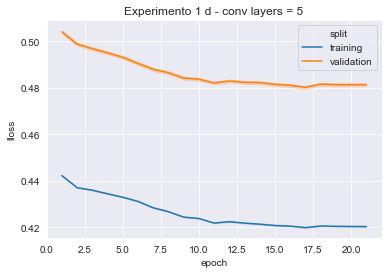

In [106]:
sns.set_style('darkgrid')
train_val_df = conv_layers_5[conv_layers_5.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='lloss', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 1 d - conv layers = 5')
ax_acc.plot()

In [107]:
val_epoch = conv_layers_5[(conv_layers_5.epoch == 8) &
                                 (conv_layers_5.split == 'validation')]
y_true = val_epoch.true.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
y_pred = val_epoch.pred.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
target_names = ['PER', 'LOC', 'ORG', 'MISC', 'O']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        PER       0.00      0.00      0.00     16331
        LOC       0.00      0.00      0.00     17874
        ORG       0.00      0.00      0.00     11697
       MISC       0.00      0.00      0.00     23557
          O       0.88      1.00      0.94    530541

avg / total       0.78      0.88      0.83    600000



/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

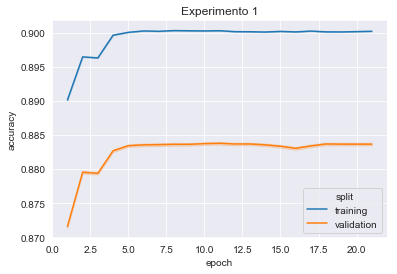

In [108]:
sns.set_style('darkgrid')
train_val_df = conv_layers_5[conv_layers_5.split.isin(['training', 'validation'])]
ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df)
ax_acc.set_title('Experimento 1')
ax_acc.plot()